<div style="text-align:center">
<img src="img/nlopt.gif" width="600">
</div>





## Introduction
Comin' soon

## Summary
1. <b> Non-linear optimizations discovery</b>
    - 1.1 How to detect a non-linear problem
        - Quadratic
        - Non linear
    - 1.2 Local or global solution, convex problem or not ?
    - 1.3 Real life examples
    - 1.4 What solver to use, Scipy, Pyomo simple model, NlOpt, Gekko , Ipopt, Lingo ?
- Each N.L solvers simple codes discovery.
2. <b> Modeling of a non linear Quadratic Programming (QP)  production mixe optimization</b>
    - 2.1 Instance
    - 2.2 Ploting costs
    - 2.3 Mathematical modeling
    - 2.4 Gekko solution
    - 2.5 Cplex solution
3. <b> Modeling of a non linear Quadratic Programming (QP)  production mixe optimization</b>
    - 3.1 Instance : The great western appliance company
    - 3.2 Mathematical modeling
    - 3.3 Ploting profits
    - 3.4 Gekko solution
    - 3.5 Cplex solution
3. <b> Modeling of a non linear facility location model</b>
    - Instance
    - Mathematical modeling
    - Gekko and Pyomo simple model solution
4. <b> Modeling of a non linear Markovitz Portfolio optimization</b>
    - Presentation of the problem in a table
    - Mathematical modeling
    - Gekko and Pyomo simple model solution
5. <b> Modeling of a non linear Oilco NLP Haverly 1978</b>
    - Presentation of the Unknown book pb
    - Mathematical modeling
    - Gekko and Pyomo simple model solution
6. <b>Modeling of an optimal dimensions of a soda can </b>
    - Presentation of the problem in a table
    - Mathematical modeling
    - Gekko and Pyomo simple model solution

7. <b> Modeling of a non linear location allocation model</b>
    - Presentation of the Beer Belge Ronald Rardin " Optimizations in O.R" 2nd edition
    - Mathematical modeling

# 1 <b> Non-linear optimizations discovery</b>

<b>1.1 Quadratic </b>

Quote by solver.com : "A quadratic programming (QP) problem has an objective which is a quadratic function of the decision variables, and constraints which are all linear functions of the variables."

Link : https://docs.mosek.com/modeling-cookbook/qcqo.html

<b>1.3 Real life examples</b><br>
https://www.math.wpi.edu/saspdf/iml/chap11.pdf
https://www.studysmarter.co.uk/explanations/business-studies/accounting/nonlinear-optimization/

# 2.Modeling of a non linear Quadratic Programming (QP) production mixe optimization

<div style="text-align:center">
<img src="img/3-AXES-2019-025-Copie.jpg" width="600">
</div>

<b>2.1 Instance</b>

I have one machine that produces 3 parts. The machine can produce a maximum of 1,000 products in the allotted time.
The selling price of parts A, B, and C decreases with the quantity produced.
- The selling price of part A is 81-qA/20 (The price decreases if a large quantity is produced)
- The selling price of part B is 90-qB/20 (The price decreases if a large quantity is produced)
- The selling price of part C is 85-qC/20 (The price decreases if a large quantity is produced)

Which parts should I sell to maximize profit while taking into account my non-linear price reduction?

<b>2.2 Ploting costs</b>

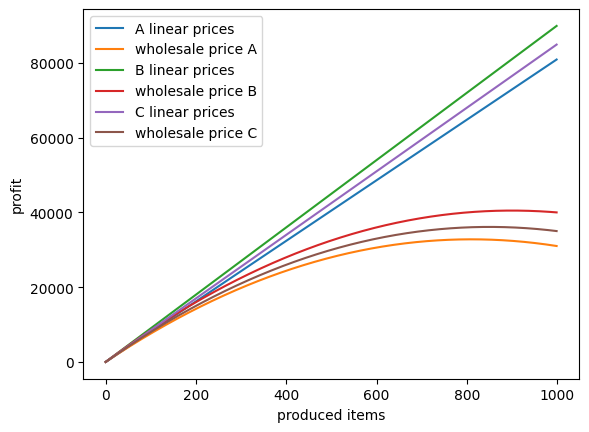

In [45]:
# -----------------------------------
# Import lib
# -----------------------------------
import matplotlib.pyplot as plt

# -----------------------------------
# Define range
# -----------------------------------
x_cords = range(0,1000)

# -----------------------------------
# functions
# -----------------------------------
linear_prices_A = [x * 81 for x in x_cords] 
non_linear_pricing_A = [x * ( 81 - x / 20) for x in x_cords] 

linear_prices_B = [x * 90 for x in x_cords] 
non_linear_pricing_B = [x * ( 90 - x / 20) for x in x_cords] 

linear_prices_C = [x * 85 for x in x_cords] 
non_linear_pricing_C = [x * ( 85 - x / 20) for x in x_cords] 

# -----------------------------------
# Plotting
# -----------------------------------
plt.plot(x_cords,linear_prices_A, label="A linear prices")
plt.plot(x_cords,non_linear_pricing_A, label="wholesale price A")

plt.plot(x_cords,linear_prices_B, label="B linear prices")
plt.plot(x_cords,non_linear_pricing_B, label="wholesale price B")

plt.plot(x_cords,linear_prices_C, label="C linear prices")
plt.plot(x_cords,non_linear_pricing_C, label="wholesale price C")

plt.xlabel("produced items")
plt.ylabel("profit")
plt.legend(loc="upper left")
plt.show()

<b>2.3 Math model</b><br>
$$
Max (P) = \sum_{j=1}^{3} x_{j}.(p_{j} - (\frac{x_{j}}{20})) 
$$
$$
subject \thinspace to 
$$
$$
 \sum_{j=1}^{3} x_{j} <= maxProd
$$
$$
x_{j} \in N
$$



$$
where
$$

$$
 x_{j} = amount \thinspace of \thinspace produced \thinspace items \thinspace j
$$
$$
 p_{j} = \thinspace produced \thinspace item \thinspace j \thinspace unit \thinspace price
$$
$$
 maxProd = max \thinspace total \thinspace produced \thinspace items
$$


<b>2.4 Gekko solution</b><br>

In [46]:
# -----------------------------------
# Import lib
# -----------------------------------
from gekko import GEKKO

# -----------------------------------
# Model
# -----------------------------------
m = GEKKO(remote=False) 

#The example problem that you referenced uses the default IPOPT solver. To get a binary or integer solution, switch to the APOPT solver.
m.options.SOLVER = 1

# -----------------------------------
# Decision variables
# -----------------------------------
A = m.Var(value=1,lb=0,ub=10000,integer=True)
B = m.Var(value=1,lb=0,ub=10000,integer=True)
C = m.Var(value=1,lb=0,ub=10000,integer=True)

# -----------------------------------
# Math model
# -----------------------------------
# Objective
m.Maximize( A * (81 - ( A / 20  )) + B * (90 - (B / 20)) + C * (85 - (C / 20)))

# Constraint
m.Equation( A + B + C <= 1000) 

# -----------------------------------
# Solution
# -----------------------------------
 
m.options.IMODE = 3 # Steady state optimization

m.solve(disp=False) # Solve

print('Solution')

print('A: ' + str(A.value))
print('B: ' + str(B.value))
print('C: ' + str(C.value))

print('Objectif: ' + str(-m.options.objfcnval))

Solution
A: [290.0]
B: [380.0]
C: [330.0]
Objectif: 68870.0


<b>2.5 Cplex solution</b><br>

<div style="text-align:center">
<img src="img/IBM_CPLEX_0.png">
</div>

In [47]:
# -----------------------------------
# Import lib
# -----------------------------------
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# -----------------------------------
# Type of problem
# -----------------------------------
model = Model(name='maximize_profit', log_output=True)

# -----------------------------------
# Decisions variables
# -----------------------------------
A = model.integer_var(name='A')
B = model.integer_var(name='B')
C = model.integer_var(name='C')

# -----------------------------------
# Math model
# -----------------------------------
# Objective
model.maximize(A * (81 - ( A / 20  )) + B * (90 - (B / 20)) + C * (85 - (C / 20))) 

# Constraints
model.add_constraint(A + B + C <= 1000)

# -----------------------------------
# Solution
# -----------------------------------
model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0


objective: 68870.000
status: OPTIMAL_SOLUTION(2)
  A=290
  B=380
  C=330


# 3. <b> Modeling of a non linear Quadratic Programming (QP)  production mixe optimization</b>

## 3.1 Instance : The great western appliance company

Sells 2 models of toasters oven, the microtoaster(X1) and the self clean toaster oven (X2).
They earn a profit of 28 dollars for each microtoaster, no matter the number of units sold.
For the self clean oven, profit increases as more units are sold due to a fixed overhead.

The profit function for the self clean oven:

21X2 + 0.25X2²

## 3.2 Math model 



$$
Max (P) = 28X1 + 21X2 + 0.25X2² 
$$
$$
subject \thinspace to 
$$
$$
 X1 + X2 <= 1000 \thinspace (Production \thinspace capacity)
$$
$$
 0.5X1 + 0.4X2 <= 500 \thinspace (Sales \thinspace time)
$$
$$
X_{j} \in N
$$



$$
where
$$

$$
 X_{j} = amount \thinspace of \thinspace produced \thinspace items \thinspace j
$$



## 3.3 Ploting profit

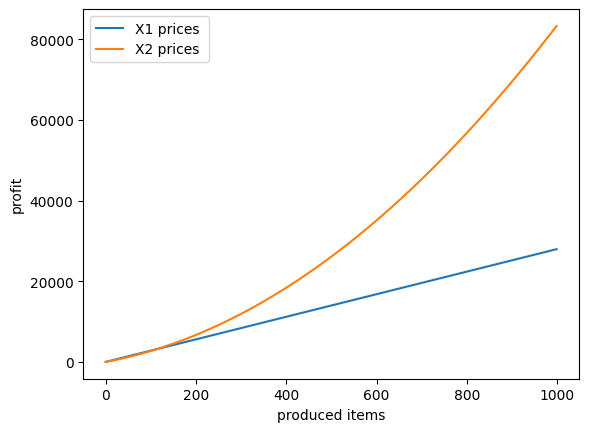

In [ ]:
# -----------------------------------
# Import lib
# -----------------------------------
import matplotlib.pyplot as plt

# -----------------------------------
# Define range
# -----------------------------------
x_cords = range(0,1000)

# -----------------------------------
# functions
# -----------------------------------
X1 = [x * 28 for x in x_cords] 
X2 = [x * 21 + (0.25 * x)**2 for x in x_cords] 

# -----------------------------------
# Plotting
# -----------------------------------
plt.plot(x_cords,X1, label="X1")
plt.plot(x_cords,X2, label="X2")
plt.xlabel("produced items")
plt.ylabel("profit")
plt.legend(loc="upper left")
plt.show()

<b>3.4 Cplex solution</b><br>

<div style="text-align:center">
<img src="img/IBM_CPLEX_0.png">
</div>

In [49]:
# -----------------------------------
# Import lib
# -----------------------------------
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# -----------------------------------
# Type of problem
# -----------------------------------
model = Model(name='maximize_profit', log_output=True)

# -----------------------------------
# Decisions variables
# -----------------------------------
X1 = model.integer_var(name='X1')
X2 = model.integer_var(name='X2')

# -----------------------------------
# Math model
# -----------------------------------
# Objective
model.maximize(28 * X1  + (21 * X2 + 0.25 * X2 ** 2))

# Constraints
model.add_constraint(X1 + X2  <= 1000)
model.add_constraint(0.5 * X1 + 0.4 * X2  <= 500)
# -----------------------------------
# Solution
# -----------------------------------
model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0


objective: 271000.000
status: OPTIMAL_SOLUTION(2)
  X2=1000
